In [2]:
from scipy import sparse
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sys import getsizeof
import numpy as np
import os
import pickle
from dash import Dash, html, dcc, callback, Output, State, Input 
from sklearn.ensemble import RandomForestClassifier
import math
import matplotlib 
import matplotlib.pyplot as plt

variableIndices = [
    0,
    36, # Precipitation
    72, # Temp Max
    108, # Temp Min
    229, # EVI
    350, # NDVI
    471, # Lai
    615, # Hydrography
    759, # Roads
    903 # Lines
]

parameters = [
    "Precipitation (1D)",
    "Temp Max (1D)",
    "Temp Min (1D)",
    "EVI (16D)",
    "NDVI (16D)",
    "LAI (16D)",
    "Hydrography",
    "Roads",
    "Transmission Lines"
]


In [4]:
testX = np.load("../data-demo/testX_demo.npy")
testY = np.load("../data-demo/testY_demo.npy")
pred_demo = np.load("../data-demo/pred_demo.npy")
print(testX.shape)

(2240, 903)


In [17]:
def create_figure(figIdx):
    fig, axs = plt.subplots(3, 3)

    curCol = 0
    curRow = 0

    for varIdx in range(1, len(variableIndices)):
        newShape = int(math.sqrt(variableIndices[varIdx]-variableIndices[varIdx-1]))
        data = testX[figIdx][variableIndices[varIdx-1]:variableIndices[varIdx]].reshape(newShape, newShape)
        curPlot = axs[curRow, curCol].imshow(data)
        axs[curRow, curCol].set_title(parameters[varIdx-1])
        plt.colorbar(curPlot, ax=axs[curRow, curCol])
        axs[curRow, curCol].axes.get_xaxis().set_ticks([])
        axs[curRow, curCol].axes.get_yaxis().set_ticks([])


        if curCol == 2:
            curCol = 0
            curRow += 1
        else:
            curCol+=1

    fig.tight_layout()
    # return fig

(None, 0, 0)

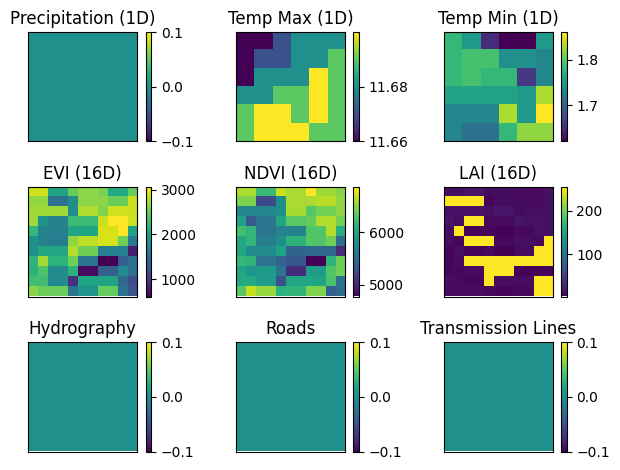

In [36]:
idx = 888

create_figure(idx), testY[idx], pred_demo[idx]